In [29]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow as tf

In [31]:
pip install matplotlib

In [32]:
import matplotlib.pyplot as plt

In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd

In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 51588 files belonging to 47 classes.


In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2700 files belonging to 47 classes.


In [39]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[143.      142.      173.     ]
   [146.      145.      176.     ]
   [142.5     141.5     172.5    ]
   ...
   [160.5     156.5     179.5    ]
   [159.5     155.5     178.5    ]
   [154.75    150.75    173.75   ]]

  [[147.25    146.25    177.25   ]
   [144.      143.      174.     ]
   [139.75    138.75    169.75   ]
   ...
   [145.      141.      164.     ]
   [157.75    153.75    176.75   ]
   [154.      150.      173.     ]]

  [[144.      143.      174.     ]
   [147.75    146.75    177.75   ]
   [148.      147.      178.     ]
   ...
   [167.5     163.5     186.5    ]
   [147.25    143.25    166.25   ]
   [153.      149.      172.     ]]

  ...

  [[155.75    155.75    181.75   ]
   [154.25    154.25    180.25   ]
   [152.      152.      178.     ]
   ...
   [130.5     126.5     151.5    ]
   [117.5     113.5     138.5    ]
   [127.25    123.25    148.25   ]]

  [[150.75    150.75    176.75   ]
   [151.75    151.75    177.75   ]
   [152.75    152.75    178.75   ]
 

In [40]:
cnn = tf.keras.models.Sequential()

Bulding Model

In [41]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization

In [42]:
model=Sequential()

In [43]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [44]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [45]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [46]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [47]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [48]:
model.add(Dropout(0.2))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1000,activation='relu'))

In [51]:
model.add(Dropout(0.2))

In [52]:
model.add(Dense(units=47,activation='softmax'))

Compiling Model

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,812,239 (25.99 MB)

 Trainable params: 6,810,255 (25.98 MB)

 Non-trainable params: 1,984 (7.75 KB)

Training Model

In [55]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=50)

Epoch 1/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 678s 418ms/step - accuracy: 0.5767 - loss: 1.5663 - val_accuracy: 0.8267 - val_loss: 0.5418
Epoch 2/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 645s 400ms/step - accuracy: 0.8413 - loss: 0.4805 - val_accuracy: 0.8578 - val_loss: 0.4529
Epoch 3/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 644s 399ms/step - accuracy: 0.8980 - loss: 0.3044 - val_accuracy: 0.8878 - val_loss: 0.3682
Epoch 4/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 33899s 21s/step - accuracy: 0.9266 - loss: 0.2208 - val_accuracy: 0.9359 - val_loss: 0.1899
Epoch 5/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 653s 405ms/step - accuracy: 0.9462 - loss: 0.1521 - val_accuracy: 0.9222 - val_loss: 0.2675
Epoch 6/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 642s 398ms/step - accuracy: 0.9622 - loss: 0.1116 - val_accuracy: 0.9356 - val_loss: 0.2258
Epoch 7/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 643s 398ms/step - accuracy: 0.9587 - loss: 0.1210 - val_accuracy: 0.9348 - val_loss: 0.2318
Epoch 8/50
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 642s 398ms/step - ac

Evaluation

In [56]:
train_loss,train_acc=model.evaluate(training_set)

1613/1613 ━━━━━━━━━━━━━━━━━━━━ 173s 107ms/step - accuracy: 0.9997 - loss: 0.0011


In [57]:
print(train_loss,train_acc)

0.001076779211871326 0.9997286200523376


In [58]:
val_loss,val_acc=model.evaluate(validation_set)

85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9860 - loss: 0.0844


In [59]:
print(val_loss,val_acc)

0.0730951800942421 0.9877777695655823


Saving

In [60]:
model.save("trained_model.h5")

In [61]:
training_history.history

{'accuracy': [0.7050864696502686,
  0.8591727018356323,
  0.9091455340385437,
  0.9330270886421204,
  0.9506280422210693,
  0.962064802646637,
  0.9646623134613037,
  0.9736372828483582,
  0.9760409593582153,
  0.9782313704490662,
  0.981158435344696,
  0.9830386638641357,
  0.98367840051651,
  0.9865860342979431,
  0.9872063398361206,
  0.9885244369506836,
  0.987535834312439,
  0.9897456765174866,
  0.9900170564651489,
  0.9913739562034607,
  0.9906373620033264,
  0.9923431873321533,
  0.9912382960319519,
  0.9930410385131836,
  0.9938551783561707,
  0.9923238158226013,
  0.9937388300895691,
  0.994184672832489,
  0.9923431873321533,
  0.9940296411514282,
  0.994165301322937,
  0.9945917725563049,
  0.9945724010467529,
  0.9940296411514282,
  0.995444655418396,
  0.9948631525039673,
  0.9951151609420776,
  0.9957548379898071,
  0.9955803751945496,
  0.9945917725563049,
  0.9959680438041687,
  0.9960843324661255,
  0.9951732754707336,
  0.9956966638565063,
  0.9960262179374695,
  0.99

In [62]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

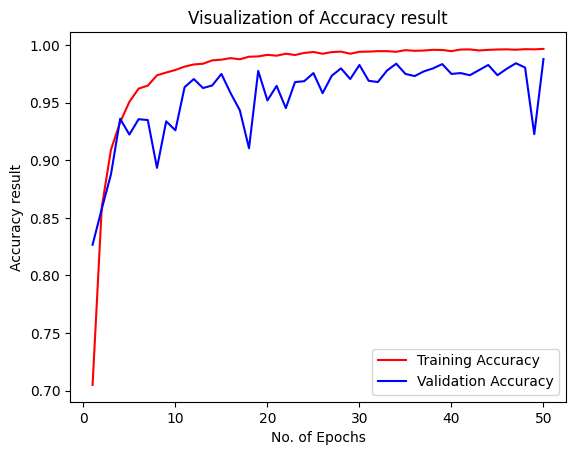

In [63]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

In [64]:
class_names = validation_set.class_names
class_names

['Anthracnose Mango',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Bacterial Canker Mango',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Cutting Weevil Mango',
 'Die Back Mango',
 'Gall Midge Mango',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Healthy Mango',
 'Not_A_Leaf',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Powdery Mildew Mango',
 'Rose_Black Spot',
 'Rose_Downy Mildew',
 'Rose_Fresh Leaf',
 'Sooty Mould Mango',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2700 files belonging to 47 classes.


In [66]:
y_pred = model.predict(test_set)
y_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step


array([[9.3701559e-01, 3.2763924e-12, 6.5007797e-15, ..., 4.7916925e-15,
        2.4274199e-17, 5.1949873e-15],
       [9.9999952e-01, 2.7620644e-17, 3.8860075e-17, ..., 1.8519623e-13,
        7.2103666e-17, 4.6889108e-14],
       [2.2494849e-03, 2.7953613e-13, 4.4369259e-16, ..., 1.2200249e-13,
        1.2573069e-15, 3.8941865e-14],
       ...,
       [4.2089038e-15, 2.0387140e-13, 2.0782699e-17, ..., 2.4113225e-17,
        5.7812632e-17, 9.9999976e-01],
       [9.8651184e-23, 1.1614137e-25, 3.2126262e-28, ..., 1.6585304e-15,
        6.0738983e-23, 1.0000000e+00],
       [2.4575843e-20, 1.9133528e-23, 4.3626912e-27, ..., 7.8751896e-22,
        2.8477332e-24, 1.0000000e+00]], dtype=float32)

In [67]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(2700,), dtype=int64, numpy=array([ 0,  0, 22, ..., 46, 46, 46], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(2700, 47), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2700,), dtype=int64, numpy=array([ 0,  0,  0, ..., 46, 46, 46], dtype=int64)>

In [70]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.1/10.6 MB 4.2 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.6 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 7.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/10.6 MB 8.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 9.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 9.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.6 MB 9.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 10.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 10.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 10.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 10.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.8/10.6 MB 10.7 MB/s eta 0:00:01


In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                               precision    recall  f1-score   support

                            Anthracnose Mango       1.00      0.92      0.96        25
                           Apple___Apple_scab       1.00      1.00      1.00        32
                            Apple___Black_rot       0.97      1.00      0.98        32
                     Apple___Cedar_apple_rust       1.00      1.00      1.00        15
                              Apple___healthy       0.97      1.00      0.98        83
                       Bacterial Canker Mango       1.00      0.96      0.98        25
                      Cherry___Powdery_mildew       1.00      1.00      1.00        53
                             Cherry___healthy       1.00      0.98      0.99        44
   Corn___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.92      0.96        26
                           Corn___Common_rust       1.00      1.00      1.00        60
                  Corn___Northern_Leaf_Bli

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 23,   0,   0, ...,   0,   0,   0],
       [  0,  32,   0, ...,   0,   0,   0],
       [  0,   0,  32, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 269,   0,   0],
       [  0,   0,   0, ...,   0,  18,   0],
       [  0,   0,   0, ...,   0,   0,  80]], dtype=int64)

In [75]:
cm.shape

(47, 47)

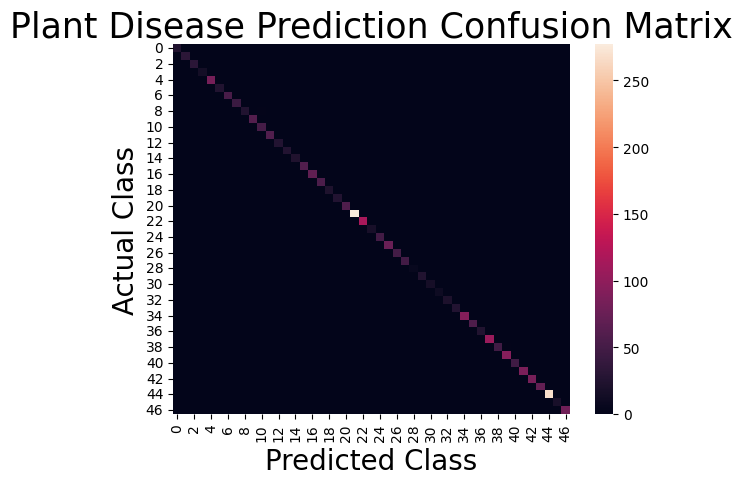

In [76]:
sns.heatmap(cm)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

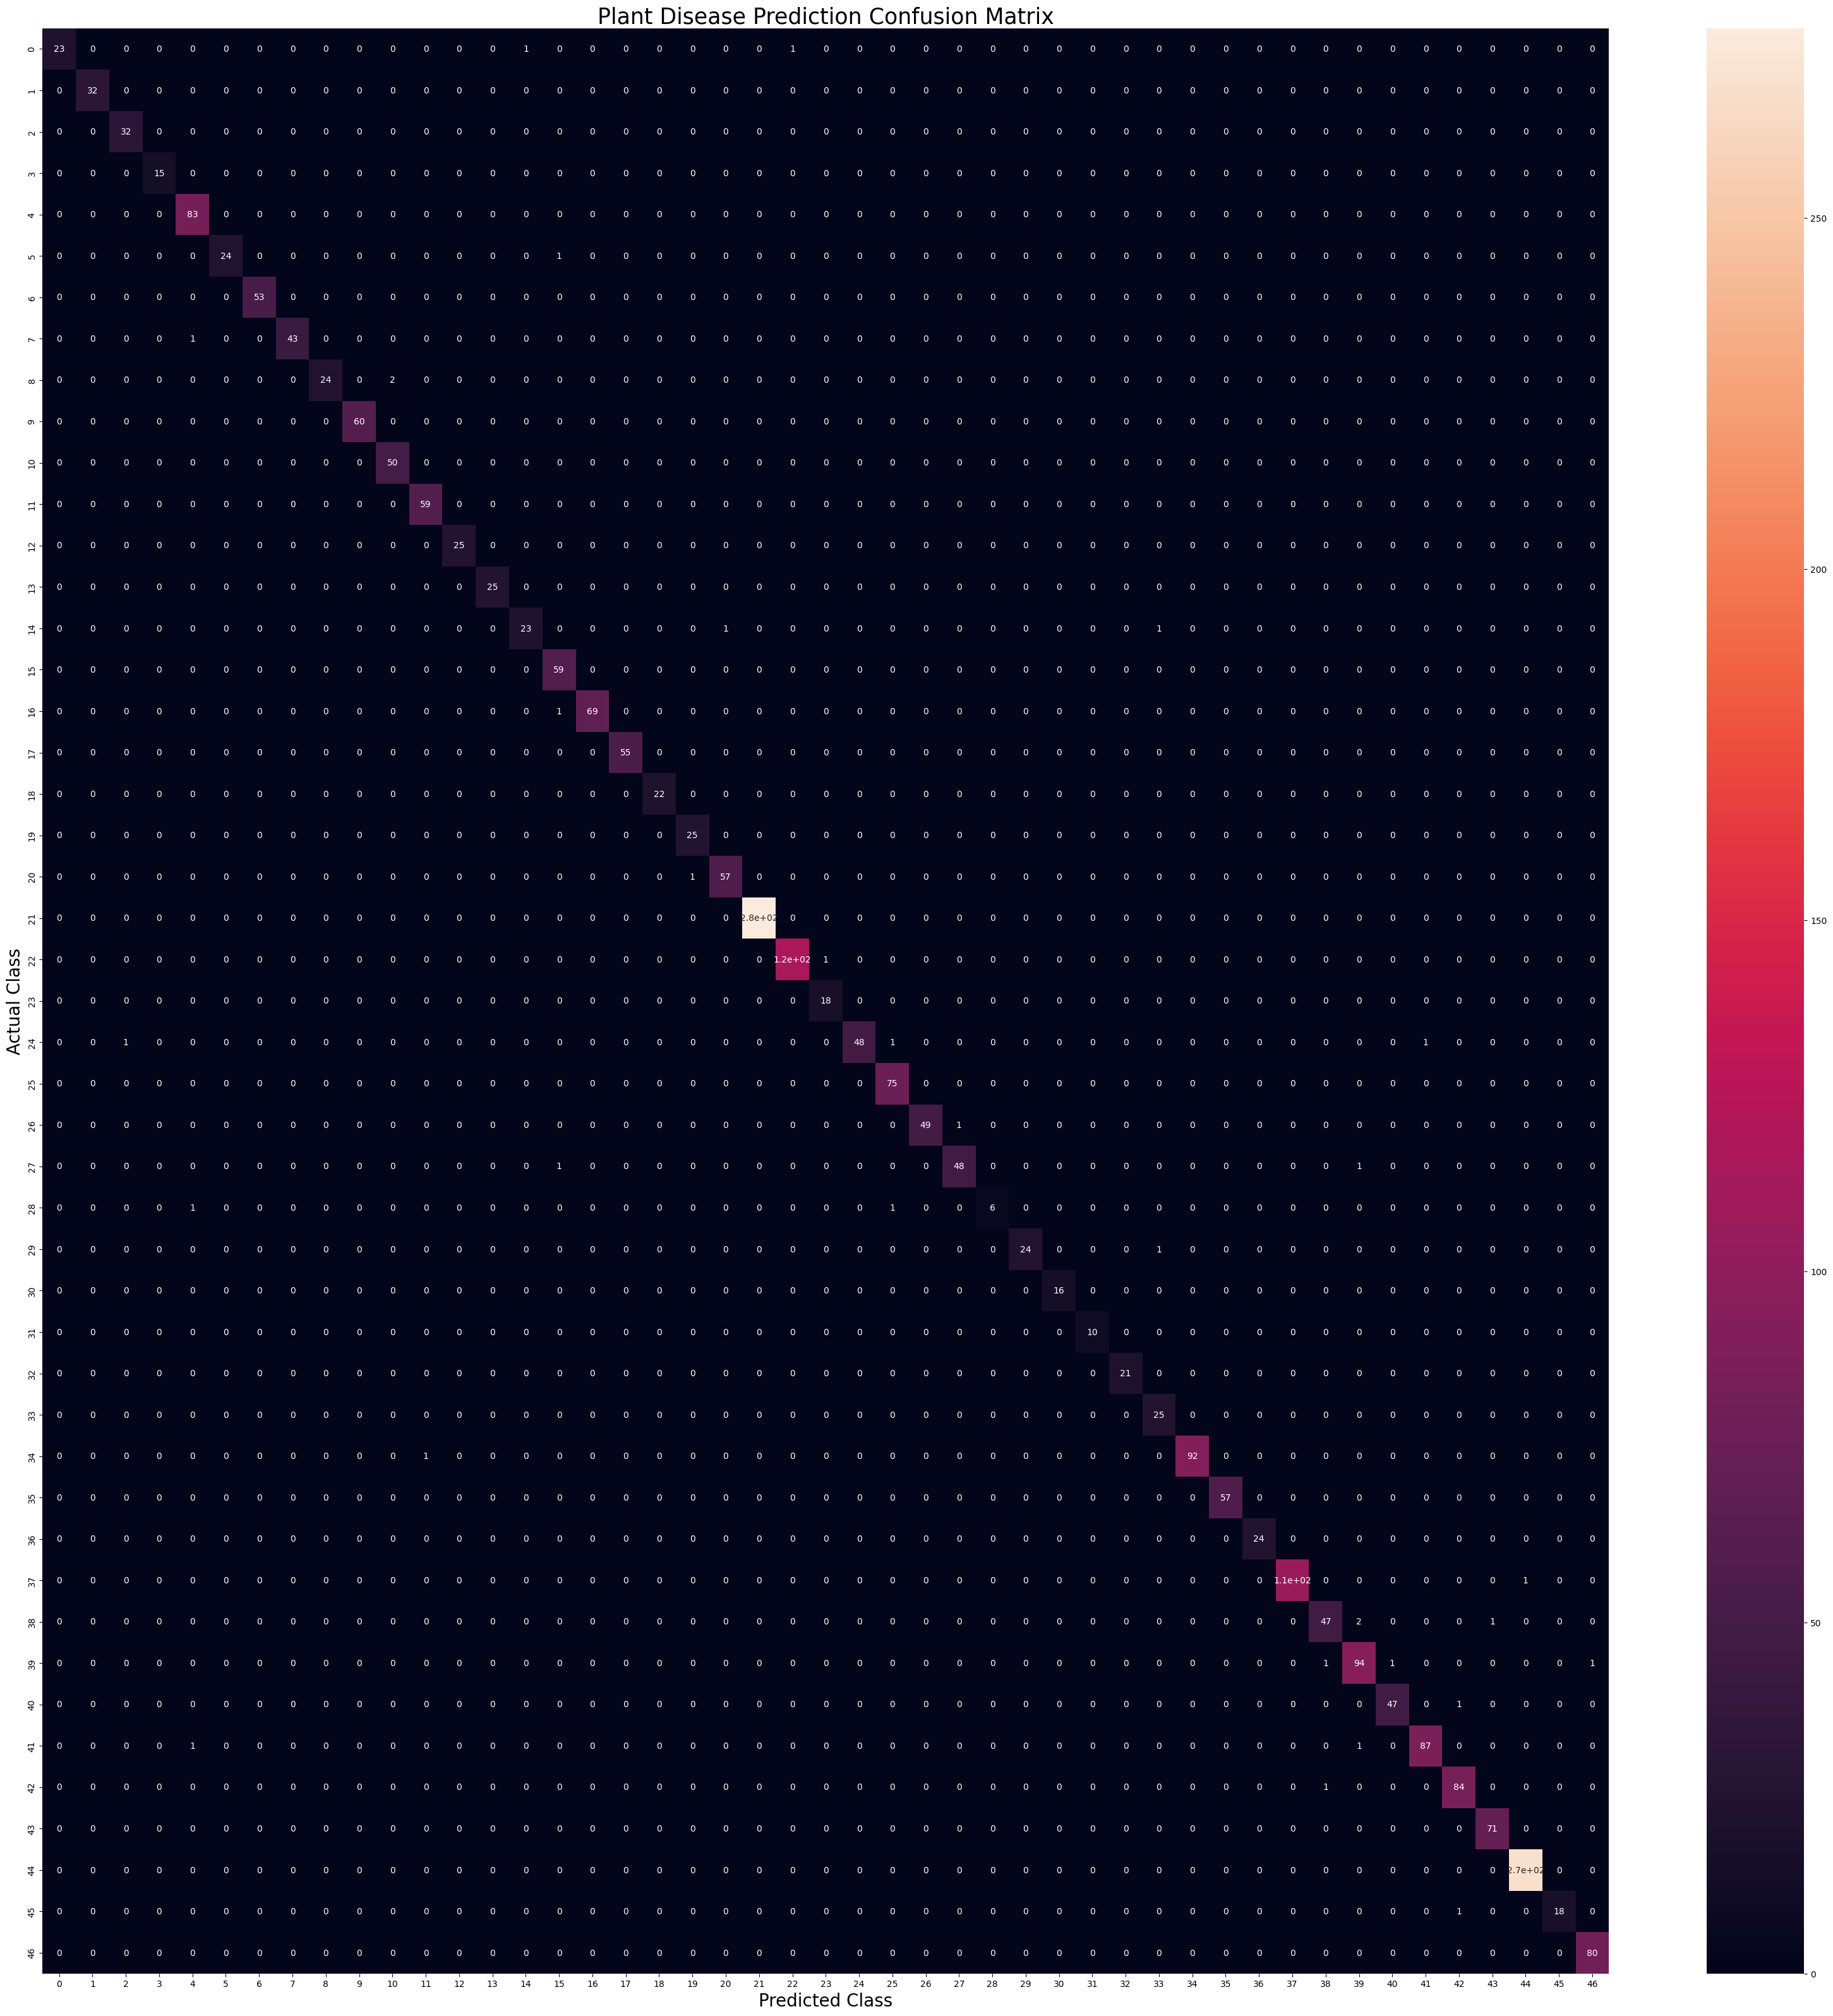

In [77]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()